# Full Experiment with CatBoost Models

This notebook runs a complete experiment using all available features with both CatBoostClassifier and CatBoostRanker models.

In [1]:
import os
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import json
import time

from lavka_recsys import Config, Experiment, setup_logging

In [2]:
setup_logging()

<Logger lavka_recsys (DEBUG)>

## Baseline Experiments

First, let's see how well a model that outputs random predictions does.

In [3]:
# Create experiment
config = (Config
    .load('default_config.yaml')
    .set('features', ['random_noise'])
    .set('model.type', 'random_baseline')
)
random_experiment = Experiment("random_baseline", config)

# Setup and run
start_time = time.time()
random_experiment.setup()
random_results = random_experiment.run()
random_time = time.time() - start_time

# Print metrics
print(f"\nRandom Baseline Results (completed in {random_time:.2f} seconds):")
for metric, value in random_results['metrics'].items():
    print(f"  {metric}: {value:.6f}")

2025-05-05 17:04:52,189 - lavka_recsys.Experiment(random_baseline_587898) - INFO - Initialized experiment: random_baseline_587898
2025-05-05 17:04:52,198 - lavka_recsys.Experiment(random_baseline_587898) - INFO - Config saved: results/random_baseline_587898_config.json
2025-05-05 17:04:52,199 - lavka_recsys.Experiment(random_baseline_587898) - INFO - Setting up experiment environment...
2025-05-05 17:04:52,201 - lavka_recsys.DataLoader - INFO - Loading training data from ../../data/lavka/train.parquet


2025-05-05 17:04:52,508 - lavka_recsys.DataLoader - INFO - Loading test data from ../../data/lavka/test.parquet
2025-05-05 17:04:52,924 - lavka_recsys.DataLoader - INFO - Holdout Split:
2025-05-05 17:04:52,951 - lavka_recsys.DataLoader - INFO -   train: 2022-12-31 18:46:42 → 2024-01-03 17:31:52 (15_070_276 rows, 367 days)
2025-05-05 17:04:52,955 - lavka_recsys.DataLoader - INFO -   holdout: 2024-01-03 17:56:48 → 2024-02-02 17:34:51 (1_438_338 rows, 29 days)
2025-05-05 17:04:52,956 - lavka_recsys.Experiment(random_baseline_587898) - INFO - Setup complete.
2025-05-05 17:04:52,957 - lavka_recsys.Experiment(random_baseline_587898) - INFO - Starting experiment run...
2025-05-05 17:04:53,437 - lavka_recsys.DataLoader - INFO - Validation Split:
2025-05-05 17:04:53,459 - lavka_recsys.DataLoader - INFO -   train_history: 2022-12-31 18:46:42 → 2023-11-04 17:16:23 (12_082_523 rows, 307 days)
2025-05-05 17:04:53,463 - lavka_recsys.DataLoader - INFO -   train_target: 2023-11-04 18:19:12 → 2023-12-0

In [4]:
# random_experiment.create_submission()

Kaggle Public Score = `0.30071`.

Now let's consider a baseline that only considers popularity (i.e. `product_total_purchases`).

In [5]:
# Create experiment
config = (Config
    .load('default_config.yaml')
    .set('features', ['product_stats'])
    .set('model.type', 'single_feature')
    .set('model.config.single_feature.feature_name', 'product_total_purchases')
    .set('model.config.single_feature.desc', True)
)
pop_experiment = Experiment(
    "popularity_baseline",
    config
)

# Setup and run
start_time = time.time()
pop_experiment.setup()
pop_results = pop_experiment.run()
pop_time = time.time() - start_time

# Print metrics
print(f"\nPopularity Baseline Results (completed in {pop_time:.2f} seconds):")
for metric, value in pop_results['metrics'].items():
    print(f"  {metric}: {value:.6f}")

2025-05-05 17:05:05,667 - lavka_recsys.Experiment(popularity_baseline_03697e) - INFO - Initialized experiment: popularity_baseline_03697e
2025-05-05 17:05:05,674 - lavka_recsys.Experiment(popularity_baseline_03697e) - INFO - Config saved: results/popularity_baseline_03697e_config.json
2025-05-05 17:05:05,675 - lavka_recsys.Experiment(popularity_baseline_03697e) - INFO - Setting up experiment environment...
2025-05-05 17:05:05,677 - lavka_recsys.DataLoader - INFO - Loading training data from ../../data/lavka/train.parquet


2025-05-05 17:05:06,006 - lavka_recsys.DataLoader - INFO - Loading test data from ../../data/lavka/test.parquet
2025-05-05 17:05:06,297 - lavka_recsys.DataLoader - INFO - Holdout Split:
2025-05-05 17:05:06,324 - lavka_recsys.DataLoader - INFO -   train: 2022-12-31 18:46:42 → 2024-01-03 17:31:52 (15_070_276 rows, 367 days)
2025-05-05 17:05:06,328 - lavka_recsys.DataLoader - INFO -   holdout: 2024-01-03 17:56:48 → 2024-02-02 17:34:51 (1_438_338 rows, 29 days)
2025-05-05 17:05:06,329 - lavka_recsys.Experiment(popularity_baseline_03697e) - INFO - Setup complete.
2025-05-05 17:05:06,330 - lavka_recsys.Experiment(popularity_baseline_03697e) - INFO - Starting experiment run...
2025-05-05 17:05:06,725 - lavka_recsys.DataLoader - INFO - Validation Split:
2025-05-05 17:05:06,745 - lavka_recsys.DataLoader - INFO -   train_history: 2022-12-31 18:46:42 → 2023-11-04 17:16:23 (12_082_523 rows, 307 days)
2025-05-05 17:05:06,749 - lavka_recsys.DataLoader - INFO -   train_target: 2023-11-04 18:19:12 → 2

In [7]:
# pop_experiment.create_submission()

Kaggle Public Score = `0.33188`.

## CatBoost Classifier Experiment

Run an experiment with CatBoost Classifier.

In [8]:
classifier_experiment = Experiment("catboost_classifier", (Config
    .load('default_config.yaml')
    .set('model.type', 'catboost_classifier')
))

# Setup and run
start_time = time.time()
classifier_experiment.setup()
classifier_results = classifier_experiment.run()
classifier_time = time.time() - start_time

# Print metrics
print(f"\nCatBoost Classifier Results (completed in {classifier_time:.2f} seconds):")
for metric, value in classifier_results['metrics'].items():
    print(f"  {metric}: {value:.6f}")

# Print feature importance
if 'feature_importance' in classifier_results:
    print("\nTop 10 Important Features:")
    top_features = sorted(classifier_results['feature_importance'].items(), 
                        key=lambda x: x[1], reverse=True)[:10]
    for feature, importance in top_features:
        print(f"  {feature}: {importance:.6f}")

2025-05-05 19:08:48,054 - lavka_recsys.Experiment(catboost_classifier_4f314c) - INFO - Initialized experiment: catboost_classifier_4f314c


2025-05-05 19:08:48,068 - lavka_recsys.Experiment(catboost_classifier_4f314c) - INFO - Config saved: results/catboost_classifier_4f314c_config.json
2025-05-05 19:08:48,069 - lavka_recsys.Experiment(catboost_classifier_4f314c) - INFO - Setting up experiment environment...
2025-05-05 19:08:48,071 - lavka_recsys.DataLoader - INFO - Loading training data from ../../data/lavka/train.parquet
2025-05-05 19:08:48,363 - lavka_recsys.DataLoader - INFO - Loading test data from ../../data/lavka/test.parquet
2025-05-05 19:08:48,574 - lavka_recsys.DataLoader - INFO - Holdout Split:
2025-05-05 19:08:48,603 - lavka_recsys.DataLoader - INFO -   train: 2022-12-31 18:46:42 → 2024-01-03 17:31:52 (15_070_276 rows, 367 days)
2025-05-05 19:08:48,607 - lavka_recsys.DataLoader - INFO -   holdout: 2024-01-03 17:56:48 → 2024-02-02 17:34:51 (1_438_338 rows, 29 days)
2025-05-05 19:08:48,609 - lavka_recsys.Experiment(catboost_classifier_4f314c) - INFO - Setup complete.
2025-05-05 19:08:48,609 - lavka_recsys.Experim

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC, NDCG is/are not implemented for GPU
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


2025-05-05 19:10:03,497 - lavka_recsys.Experiment(catboost_classifier_4f314c) - INFO - Training completed in 72.02s
2025-05-05 19:10:03,502 - lavka_recsys.Experiment(catboost_classifier_4f314c) - INFO - Evaluating on holdout.
2025-05-05 19:10:04,762 - lavka_recsys.CachedFeatureFactory - INFO - Using cached feature batch
2025-05-05 19:10:04,967 - lavka_recsys.CatBoostClassifierModel - INFO - Converting 'source_type' to string for CatBoost
2025-05-05 19:10:05,008 - lavka_recsys.CatBoostClassifierModel - INFO - Converting 'city_name' to string for CatBoost
2025-05-05 19:10:05,028 - lavka_recsys.CatBoostClassifierModel - INFO - Converting 'user_segment' to string for CatBoost
2025-05-05 19:10:19,304 - lavka_recsys.Experiment(catboost_classifier_4f314c) - INFO - Run results saved: results/catboost_classifier_4f314c_results.json
2025-05-05 19:10:19,309 - lavka_recsys.Experiment(catboost_classifier_4f314c) - INFO - Run finished and results saved.

CatBoost Classifier Results (completed in 91.

In [4]:
classifier_experiment.create_submission()

2025-05-05 18:30:06,493 - lavka_recsys.Experiment(catboost_classifier_3f6423) - INFO - Computing predictions...
2025-05-05 18:30:06,500 - lavka_recsys.DataLoader - INFO - Holdout data merged back into training data.
2025-05-05 18:30:06,555 - lavka_recsys.DataLoader - INFO - Validation Split:
2025-05-05 18:30:06,584 - lavka_recsys.DataLoader - INFO -   history: 2022-12-31 18:46:42 → 2024-01-03 17:31:52 (15_070_276 rows, 367 days)
2025-05-05 18:30:06,588 - lavka_recsys.DataLoader - INFO -   target: 2024-01-03 17:56:48 → 2024-02-02 17:34:51 (1_438_338 rows, 29 days)
2025-05-05 18:30:07,838 - lavka_recsys.CachedFeatureFactory - INFO - Using cached feature batch
2025-05-05 18:30:07,842 - lavka_recsys.ModelFactory - INFO - Creating catboost_classifier model with params: {'loss_function': 'Logloss', 'eval_metric': 'AUC', 'early_stopping_rounds': 50, 'custom_metric': ['AUC', 'NDCG:top=10'], 'task_type': 'GPU', 'devices': '3,4,5', 'thread_count': -1}
2025-05-05 18:30:08,102 - lavka_recsys.CatBo

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC, NDCG is/are not implemented for GPU
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


2025-05-05 18:31:30,942 - lavka_recsys.Experiment(catboost_classifier_3f6423) - INFO - Training completed in 83.10s
2025-05-05 18:31:30,949 - lavka_recsys.DataLoader - INFO - Holdout data merged back into training data.
2025-05-05 18:31:31,020 - lavka_recsys.CachedFeatureFactory - INFO - Generating feature batch
2025-05-05 18:31:31,021 - lavka_recsys.FeatureFactory - INFO - Invoking feature generators: source_type, count_purchase_user_product, count_purchase_user_store, ctr_product, cart_to_purchase_rate, purchase_view_ratio, recency_user_product, user_stats, product_stats, store_stats, city_stats, product_temporal_patterns, recency_user_store, time_features, time_window_user_product, session_features, frequency_features, product_popularity_trend, cross_features, user_segments, memory-based-cf, npmi-cf, puresvd-cf, svd-cf
2025-05-05 18:32:54,839 - lavka_recsys.FeatureFactory - INFO - Joined features
2025-05-05 18:32:54,843 - lavka_recsys.FeatureFactory - INFO - All column names: {'user

index,request_id
u32,u64
177,3019379937258044704
3452,14439634211702568835
23810,3019379937258044704
36411,14439634211702568835
41213,14439634211702568835
…,…
102967,3826735201843318451
201356,3826735201843318451
198443,5291459374113443837


Kaggle Public Score: `NDCG@10 = 0.40858`

## CatBoost Ranker Experiment

Run an experiment with CatBoost Ranker.

In [5]:
ranker_experiment = Experiment("catboost_ranker", (Config
    .load('default_config.yaml')
    .set('model.type', 'catboost_ranker')
    .set('model.config.catboost_ranker.iterations', 300)
))

# Setup and run
start_time = time.time()
ranker_experiment.setup()
ranker_results = ranker_experiment.run()
ranker_time = time.time() - start_time

# Print metrics
print(f"\nCatBoost Ranker Results (completed in {ranker_time:.2f} seconds):")
for metric, value in ranker_results['metrics'].items():
    print(f"  {metric}: {value:.6f}")

# Print feature importance
if 'feature_importance' in ranker_results:
    print("\nTop 10 Important Features:")
    top_features = sorted(ranker_results['feature_importance'].items(), 
                        key=lambda x: x[1], reverse=True)[:10]
    for feature, importance in top_features:
        print(f"  {feature}: {importance:.6f}")

2025-05-05 18:54:53,413 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Initialized experiment: catboost_ranker_611ad3
2025-05-05 18:54:53,423 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Config saved: results/catboost_ranker_611ad3_config.json
2025-05-05 18:54:53,436 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Setting up experiment environment...
2025-05-05 18:54:53,437 - lavka_recsys.DataLoader - INFO - Loading training data from ../../data/lavka/train.parquet


2025-05-05 18:54:53,798 - lavka_recsys.DataLoader - INFO - Loading test data from ../../data/lavka/test.parquet
2025-05-05 18:54:54,012 - lavka_recsys.DataLoader - INFO - Holdout Split:
2025-05-05 18:54:54,039 - lavka_recsys.DataLoader - INFO -   train: 2022-12-31 18:46:42 → 2024-01-03 17:31:52 (15_070_276 rows, 367 days)
2025-05-05 18:54:54,044 - lavka_recsys.DataLoader - INFO -   holdout: 2024-01-03 17:56:48 → 2024-02-02 17:34:51 (1_438_338 rows, 29 days)
2025-05-05 18:54:54,045 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Setup complete.
2025-05-05 18:54:54,047 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Starting experiment run...
2025-05-05 18:54:54,399 - lavka_recsys.DataLoader - INFO - Validation Split:
2025-05-05 18:54:54,421 - lavka_recsys.DataLoader - INFO -   train_history: 2022-12-31 18:46:42 → 2023-11-04 17:16:23 (12_082_523 rows, 307 days)
2025-05-05 18:54:54,425 - lavka_recsys.DataLoader - INFO -   train_target: 2023-11-04 18:19:12 → 2023-12-0

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because PFound, PrecisionAt, RecallAt, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric RecallAt:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


2025-05-05 18:55:48,449 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Training completed in 51.32s
2025-05-05 18:55:48,454 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Evaluating on holdout.
2025-05-05 18:55:49,698 - lavka_recsys.CachedFeatureFactory - INFO - Using cached feature batch
2025-05-05 18:55:49,979 - lavka_recsys.CatBoostRankerModel - INFO - Sorting data by group_id for grouped ranking
2025-05-05 18:55:52,842 - lavka_recsys.CatBoostRankerModel - INFO - Converting 'source_type' to string for CatBoost
2025-05-05 18:55:52,866 - lavka_recsys.CatBoostRankerModel - INFO - Converting 'city_name' to string for CatBoost
2025-05-05 18:55:52,886 - lavka_recsys.CatBoostRankerModel - INFO - Converting 'user_segment' to string for CatBoost
2025-05-05 18:56:08,590 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Run results saved: results/catboost_ranker_611ad3_results.json
2025-05-05 18:56:08,593 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO

In [6]:
ranker_experiment.create_submission()

2025-05-05 18:56:08,711 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Computing predictions...
2025-05-05 18:56:08,718 - lavka_recsys.DataLoader - INFO - Holdout data merged back into training data.
2025-05-05 18:56:08,758 - lavka_recsys.DataLoader - INFO - Validation Split:
2025-05-05 18:56:08,787 - lavka_recsys.DataLoader - INFO -   history: 2022-12-31 18:46:42 → 2024-01-03 17:31:52 (15_070_276 rows, 367 days)
2025-05-05 18:56:08,792 - lavka_recsys.DataLoader - INFO -   target: 2024-01-03 17:56:48 → 2024-02-02 17:34:51 (1_438_338 rows, 29 days)
2025-05-05 18:56:10,080 - lavka_recsys.CachedFeatureFactory - INFO - Using cached feature batch
2025-05-05 18:56:10,083 - lavka_recsys.ModelFactory - INFO - Creating catboost_ranker model with params: {'iterations': 300, 'loss_function': 'YetiRankPairwise', 'eval_metric': 'NDCG:top=10', 'early_stopping_rounds': 50, 'custom_metric': ['NDCG:top=10', 'PrecisionAt:top=10', 'RecallAt:top=10'], 'task_type': 'GPU', 'devices': '4,5', 'thr

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because PFound, PrecisionAt, RecallAt, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PrecisionAt:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric RecallAt:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


2025-05-05 18:56:54,691 - lavka_recsys.Experiment(catboost_ranker_611ad3) - INFO - Training completed in 44.61s
2025-05-05 18:56:54,697 - lavka_recsys.DataLoader - INFO - Holdout data merged back into training data.
2025-05-05 18:56:54,755 - lavka_recsys.CachedFeatureFactory - INFO - Generating feature batch
2025-05-05 18:56:54,756 - lavka_recsys.FeatureFactory - INFO - Invoking feature generators: source_type, count_purchase_user_product, count_purchase_user_store, ctr_product, cart_to_purchase_rate, purchase_view_ratio, recency_user_product, user_stats, product_stats, store_stats, city_stats, product_temporal_patterns, recency_user_store, time_features, time_window_user_product, session_features, frequency_features, product_popularity_trend, cross_features, user_segments, memory-based-cf, npmi-cf, puresvd-cf, svd-cf
2025-05-05 18:58:23,838 - lavka_recsys.FeatureFactory - INFO - Joined features
2025-05-05 18:58:23,841 - lavka_recsys.FeatureFactory - INFO - All column names: {'store_to

index,request_id
u32,u64
95970,18037997914549181289
30298,9569074287073451052
250864,9569074287073451052
196870,6482228966567928247
49,7031063856632495722
…,…
66172,18222817017553787800
170115,18222817017553787800
46261,10721779790431623309


Kaggle Public Score: `NDCG@10 = 0.40905`

## 7. Feature Importance Comparison

Top 20 Features by Average Importance:


,Feature,Classifier Importance,Ranker Importance,Average Importance
0,source_type,65.197461,78.322564,71.760012
1,purchase_view_ratio,4.724825,3.358576,4.041701
2,count_purchase_u_p,3.587317,2.747350,3.167333
3,hour_of_day,0.718127,2.782396,1.750261
4,purchases_month_u_p,2.384760,0.775251,1.580005
5,cf_score,1.410100,1.023112,1.216606
6,mean_interval_days,1.523780,0.642426,1.083103
7,user_total_views,1.422659,0.290614,0.856636
8,cart_to_purchase_rate,0.757468,0.763102,0.760285
9,svd_cf_score,0.862317,0.617547,0.739932


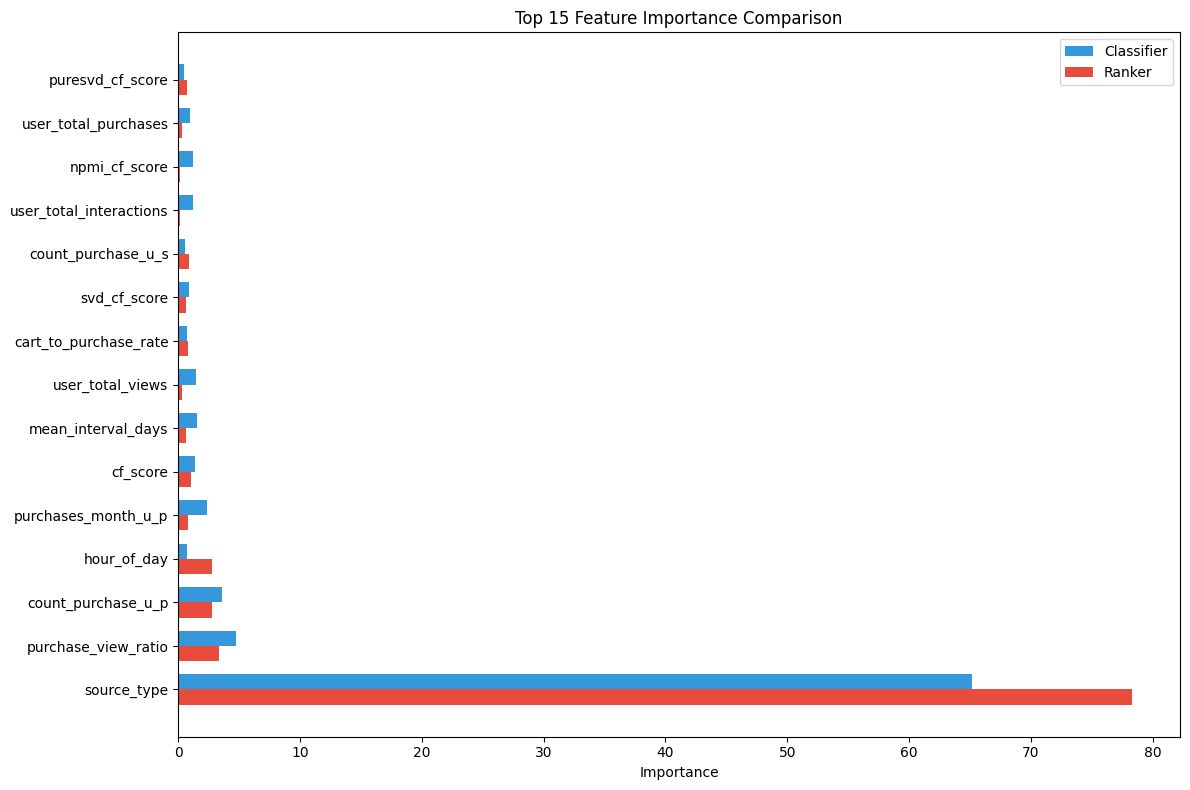

In [10]:
# Compare feature importance between models
if 'feature_importance' in classifier_results and 'feature_importance' in ranker_results:
    # Get all features from both models
    all_features = set(list(classifier_results['feature_importance'].keys()) + 
                        list(ranker_results['feature_importance'].keys()))
    
    # Create comparison dataframe
    fi_comparison = {'Feature': []}
    fi_comparison['Classifier Importance'] = []
    fi_comparison['Ranker Importance'] = []
    
    for feature in all_features:
        fi_comparison['Feature'].append(feature)
        fi_comparison['Classifier Importance'].append(
            classifier_results['feature_importance'].get(feature, 0))
        fi_comparison['Ranker Importance'].append(
            ranker_results['feature_importance'].get(feature, 0))
        
    # Convert to DataFrame and sort by average importance
    fi_df = pd.DataFrame(fi_comparison)
    fi_df['Average Importance'] = (fi_df['Classifier Importance'] + fi_df['Ranker Importance']) / 2
    fi_df = fi_df.sort_values('Average Importance', ascending=False).reset_index(drop=True)
    
    # Save to results directory
    # fi_df.to_csv(f"{results_dir}/feature_importance_comparison.csv", index=False)
    
    # Display top features
    print("Top 20 Features by Average Importance:")
    display(fi_df.head(20))
    
    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    top_n = 15
    top_features = fi_df.head(top_n)
    
    x = range(len(top_features))
    width = 0.35
    
    plt.barh([p + width/2 for p in x], top_features['Classifier Importance'], 
            height=width, label='Classifier', color='#3498db')
    plt.barh([p - width/2 for p in x], top_features['Ranker Importance'], 
            height=width, label='Ranker', color='#e74c3c')
    
    plt.yticks(x, top_features['Feature'])
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Feature Importance Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()